# Heart Disease Analysis and Prediction

### List of contents
---

1. [Import Library](#import-relevent-libraries)
2. [Load Dataset](#Loading-Initial-Dataset) || [Load pre-processed data](#Load-pre-processed-data)
3. [Pre-process](#Pre-processing-data)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Removing Outliers](#Removing-outliers)
6. [Correlation Matrix](#Correlation-Matrix)
7. [Algorithm Performance Comparison](#Algorithm-Performance-Comparison)

### Introduction
Stroke is a blood clot or bleeds in the brain, which can make permanent damage that has an effect
on mobility, cognition, sight or communication. Stroke is considered as medical urgent situation
and can cause long-term neurological damage, complications and often death.


**Dataset Overview**

---



The dataset was collected from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset URL. The dataset contains initially 5110 instances with 12 attributes. This dataset is used to predict
whether a patient is likely to get stroke based on the input parameters like gender, age, various
diseases, and smoking status. Each row in the data provides relevant information about the patient.

## import relevent libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="dark")

#To plot the graph embedded in the notebook
%matplotlib inline

from sklearn import metrics

#from categorical to numerical conversion
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#model algorithms
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
#from sklearn.metrics import plot_roc_curve

## Loading Initial Dataset

In [2]:
# Specify the file location and name
file_location = 'dataset/healthcare-dataset-stroke-data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_location)

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### dropping `id` column

In [13]:
# to handel the error of running the cell twice.
# [if deleted before then pass]

if 'id' in df.columns:
  df = df.drop('id', axis=1)
  print("`id` column is removed")
else:
  # Do nothing, the 'id' column is already deleted.
  print("`id` column had been removed before ")
  pass


`id` column is removed


### unique values for catetorical attributes

In [5]:
#checking unique values for catetorical attributes
print("Unique values of attributes:\n")
print("gender",df['gender'].unique())
print("ever_married ",df['ever_married'].unique())
print("work_type ",df['work_type'].unique())
print("Residence_type ",df['Residence_type'].unique())
print("smoking_status ",df['smoking_status'].unique())
print("stroke",df['stroke'].unique())
df.groupby('stroke').size()

Unique values of attributes:

gender ['Male' 'Female' 'Other']
ever_married  ['Yes' 'No']
work_type  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type  ['Urban' 'Rural']
smoking_status  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke [1 0]


stroke
0    4861
1     249
dtype: int64

## target's value difference

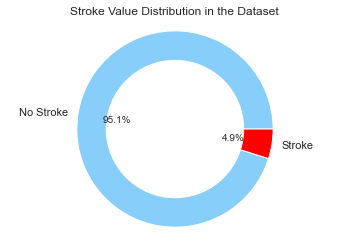

In [6]:
# a donut chart of stroke values

stroke_values = df.groupby('stroke').size()

labels = 'No Stroke', 'Stroke'
colors = ['lightskyblue', 'red']

plt.pie(stroke_values, labels=labels, autopct='%1.1f%%', startangle=0, colors=colors, wedgeprops={'width': 0.4})

# a white circle in the middle to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Stroke Value Distribution in the Dataset')
plt.axis('equal')
plt.show()


## A dataframe with only stroke patients `df_stroke`

In [7]:
#a dataframe `df_stroke` where all the instances had stroke

df_stroke = df[df['stroke'] == 1]
df_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


## Pre-processing data
removing duplicate and null values

In [8]:
#check duplicate rows

df.duplicated().sum()

0

In [9]:
#null values in each attribute

df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### 201 instanses are null in `bmi` attribute.
These null values can be -

1. removed from the dataframe
2. replaced by median/mean value
3. replaced by the max frequency value

To eleminate inconsistency, the **null** values have to be removed. Hence, option 1 is the delicate choice.

In [10]:
#the percentage of bmi that are null

null_bmi_count = df['bmi'].isnull().sum()
total_rows = len(df)
null_bmi_percentage = (null_bmi_count / total_rows) * 100
print(f"Percentage of null values in BMI column: {null_bmi_percentage:.2f}%")

Percentage of null values in BMI column: 3.93%


## remove null `bmi`

In [11]:
#remove the null values in bmi
if df['bmi'].isnull().sum()>0:
  df = df.dropna(subset=['bmi'])
  print('Null BMI values deleted')
else:
  print('No null values found!')

Null BMI values deleted


## Changing data type from object to string

In [12]:
# Get the data types of all columns
data_types = df.dtypes

# Print the data types
print(data_types)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [13]:
#converting obj attributes to str

df['gender'] = df['gender'].astype('string')
df['ever_married'] = df['ever_married'].astype('string')
df['work_type'] = df['work_type'].astype('string')
df['Residence_type'] = df['Residence_type'].astype('string')
df['smoking_status'] = df['smoking_status'].astype('string')

* save csv of age>30

In [ ]:
# a dataframe where all the rows age are over 30

df_age_over_30 = df[df['age'] > 30]
df_age_over_30

#file saved as df_age_over_30-healthcare-dataset-stroke-data

#file_location='df_age_over_30-healthcare-dataset-stroke-data.csv'
#df_age_over_30.to_csv(file_location)

* save CSV children as work_type

In [ ]:
# a dataframe where children as work_type

df_underage_children = df[df['work_type']=='children']
df_underage_children['age'].max()

#file saved as df_underage_children-healthcare-dataset-stroke-data

#file_location='df_underage_children-healthcare-dataset-stroke-data.csv'
#df_underage_children.to_csv(file_location)

16.0

## Exploratory Data Analysis

### Identifying Outliers

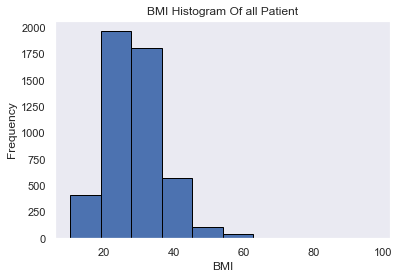

In [19]:
# a histogram of bmi

plt.hist(df['bmi'], bins=10, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Histogram Of all Patient')
plt.show()


in later section, the instances which have `bmi>60` are removed

In [17]:
# bmi that are higher than 60 and how many of them had stroke

high_bmi_df = df[df['bmi'] > 60]
high_bmi_stroke_count = high_bmi_df['stroke'].sum()
print(f"Instances with BMI higher than 60: {len(high_bmi_df)}")
print(f"Stroke patients with BMI higher than 60: {high_bmi_stroke_count}")

Instances with BMI higher than 60: 13
Stroke patients with BMI higher than 60: 0


In [18]:
#a dataframe `df_stroke` where all the instances had stroke

df_stroke = df[df['stroke'] == 1]
df_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
243,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


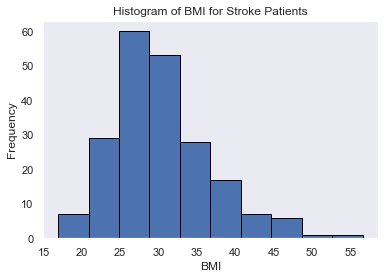

In [20]:
# histogram of df_stroke[bmi]

plt.hist(df_stroke['bmi'], edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI for Stroke Patients')
plt.show()


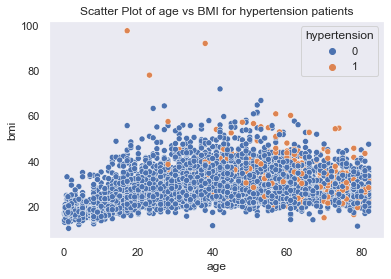

In [21]:
sns.scatterplot(data=df, x='age', y='bmi', hue='hypertension')
plt.title('Scatter Plot of age vs BMI for hypertension patients')
plt.show()

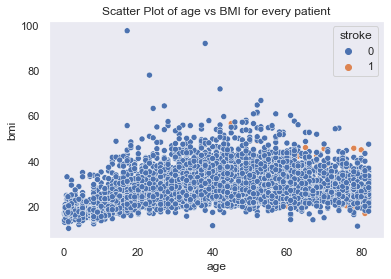

In [22]:
# create a scatter plot `bmi vs age` and separation by stroke values

sns.scatterplot(data=df, x='age', y='bmi', hue='stroke')
plt.title('Scatter Plot of age vs BMI for every patient')
plt.show()


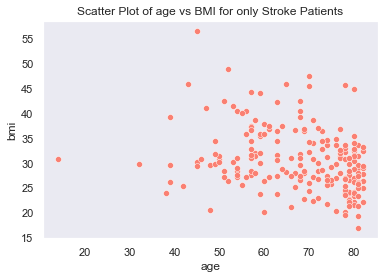

In [23]:
# create a scatter plot of df_stroke where the parameters will be bmi and age

sns.scatterplot(data=df_stroke, x='age', y='bmi',color='salmon')
plt.title('Scatter Plot of age vs BMI for only Stroke Patients')
plt.show()

age<30 and had stroke is an outlier.

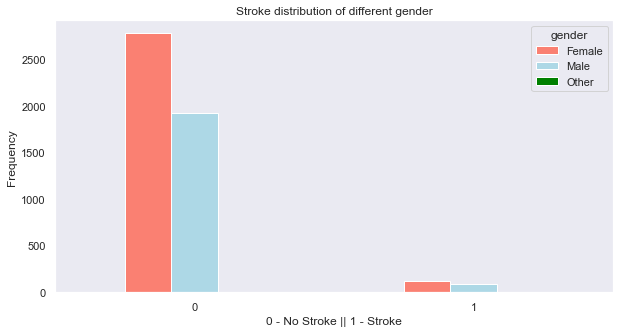

In [24]:
#stroke value of different gender
pd.crosstab(df.stroke,df.gender).plot(kind='bar',
                                   figsize=(10,5),
                                   color=['salmon','lightblue','green'])
plt.title('Stroke distribution of different gender');
plt.xlabel('0 - No Stroke || 1 - Stroke')
plt.ylabel('Frequency')
plt.xticks(rotation=0);

Identifying `other` gender

In [25]:
# how many number of rows are there where the value of gender is 'other' and location of the index

num_rows_gender_other = df[df['gender'] == 'Other'].shape[0]
index_gender_other = df[df['gender'] == 'Other'].index

print(f"Number of rows where gender is 'Other': {num_rows_gender_other}")
print(f"Index of rows where gender is 'Other': {index_gender_other}")

Number of rows where gender is 'Other': 1
Index of rows where gender is 'Other': Int64Index([3116], dtype='int64')


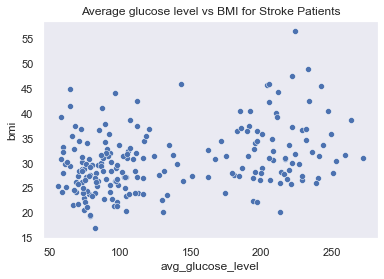

In [26]:
# Average glucose level vs BMI
sns.scatterplot(data=df_stroke, x='avg_glucose_level', y='bmi')
plt.title('Average glucose level vs BMI for Stroke Patients')
plt.show()

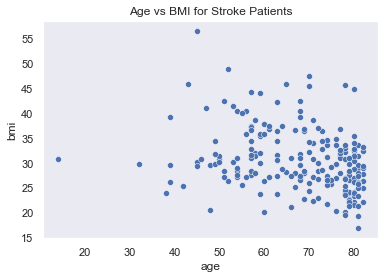

In [27]:
sns.scatterplot(data=df_stroke, x='age', y='bmi')
plt.title('Age vs BMI for Stroke Patients')
plt.show()

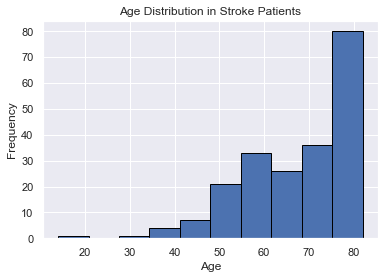

In [28]:
# Age distribution in df_stroke

df_stroke['age'].hist(bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution in Stroke Patients')
plt.show()


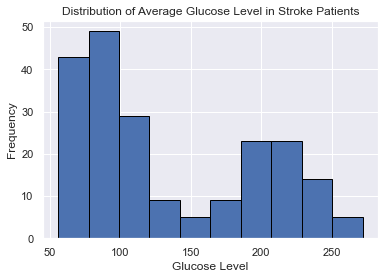

In [29]:
# avg_glucose_level distribution in df_stroke [stroke patients]

df_stroke['avg_glucose_level'].hist(edgecolor='black')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.title('Distribution of Average Glucose Level in Stroke Patients')
plt.show()


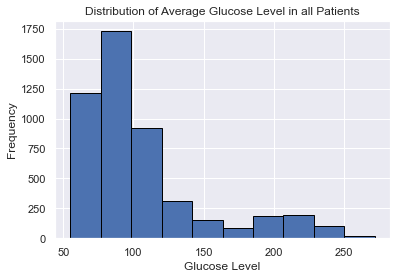

In [30]:
# avg_glucose_level distribution in all patients

df['avg_glucose_level'].hist(bins=10, edgecolor='black')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.title('Distribution of Average Glucose Level in all Patients')
plt.show()


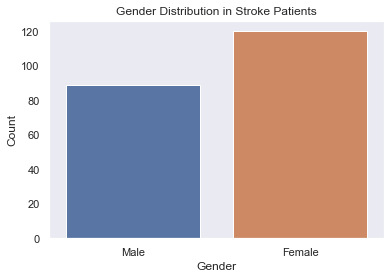

In [31]:
# gender vs stroke patients

sns.countplot(x='gender', data=df_stroke)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution in Stroke Patients')
plt.show()

### Age Distribution

In [32]:
min_age=df['age'].min()
print('Minimum age of all patients',min_age)
age_less_than_30 = df[df['age'] < 10].shape[0]
print(f"Number of rows where age < 30: {age_less_than_30}")

print()

min_stroke_age  =df_stroke['age'].min()
print('Minimum age of stroke patients',min_stroke_age)
age_less_than_30_for_stroke = df_stroke[df_stroke['age'] < 30].shape[0]
print(f"Number of rows of stroke where age < 30: {age_less_than_30_for_stroke}")

df_stroke[df_stroke['age']<20].index

Minimum age of all patients 0.08
Number of rows where age < 30: 459

Minimum age of stroke patients 14.0
Number of rows of stroke where age < 30: 1


Int64Index([245], dtype='int64')

Although it is highly unlikely to have stroke under the age of 30 but the model needs to be trained upon that. [two sets of experiments proposed later (with and without `age<30` instances)]

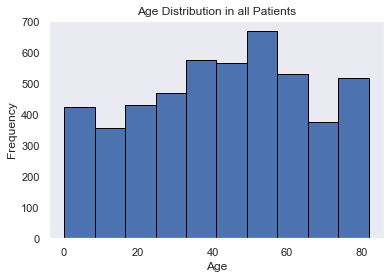

In [33]:
# hist of age distribution

plt.hist(df['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution in all Patients')
plt.show()


### Is `Smoking Status` attribute irrelevant?

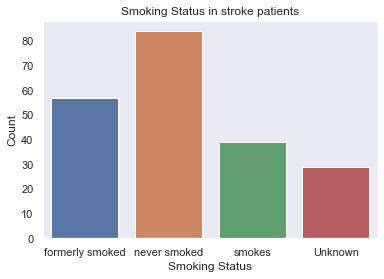

In [34]:
# smoking_status vs df_stroke

sns.countplot(x='smoking_status', data=df_stroke)
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Smoking Status in stroke patients')
plt.show()

Hypothesis : `smoking_status` depicts to be not a compatible attribute as  the dataset shows the patients that never smoked ended up having a stroke.

However, it turns out most of the patients that never smoked are over 60 years.

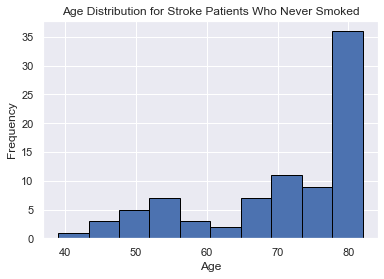

In [35]:
# a histogram of age where smoking_status=never smoked

df_never_smoked = df_stroke[df_stroke['smoking_status'] == 'never smoked']
df_never_smoked['age'].hist(bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for Stroke Patients Who Never Smoked')
plt.show()


Age distribution of stroke patients who `smokes` and `formerly smoked`

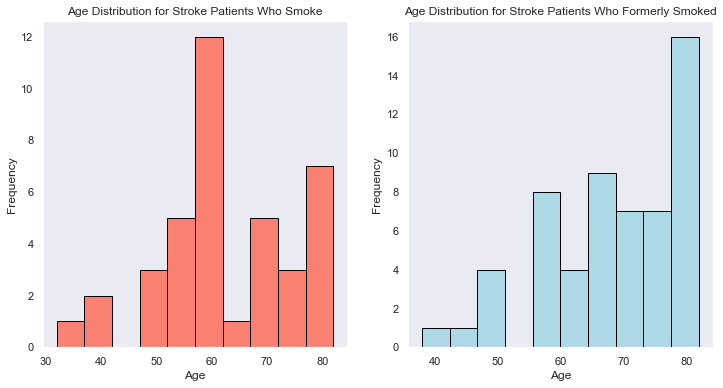

In [36]:
# Age distribution of stroke patients who smokes and formerly smoked`

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram of age for smokers
ax1.hist(df_stroke[df_stroke['smoking_status'] == 'smokes']['age'], edgecolor='black', color='salmon')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.set_title('Age Distribution for Stroke Patients Who Smoke')

# Plot the histogram of age for formerly smokers
ax2.hist(df_stroke[df_stroke['smoking_status'] == 'formerly smoked']['age'], edgecolor='black', color='lightblue')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')
ax2.set_title('Age Distribution for Stroke Patients Who Formerly Smoked')

# Show the plot
plt.show()


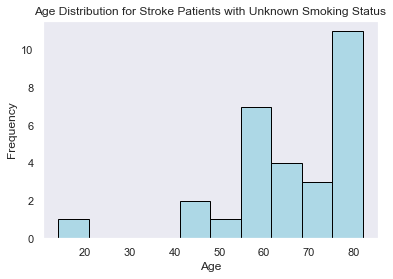

In [37]:
# Age distribution of stroke patients whos smoking status are Unknown

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the histogram of age for patients with unknown smoking status
ax.hist(df_stroke[df_stroke['smoking_status'] == 'Unknown']['age'], edgecolor='black', color='lightblue')

# Set the labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Age Distribution for Stroke Patients with Unknown Smoking Status')

# Show the plot
plt.show()


## marital status effect on strokes

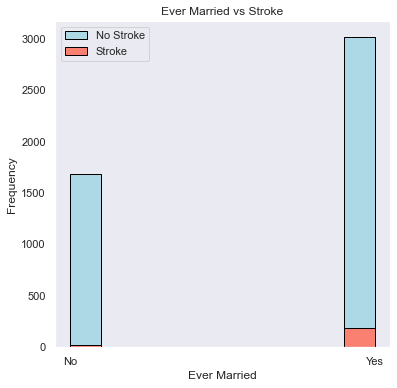

In [38]:
fig, ax1 = plt.subplots(figsize=(6, 6))

# Plot the histogram of ever_married for stroke and non-stroke patients in the first subplot
ax1.hist(df[df['stroke'] == 0]['ever_married'], edgecolor='black', color='lightblue', label='No Stroke')
ax1.hist(df[df['stroke'] == 1]['ever_married'], edgecolor='black', color='salmon', label='Stroke')
ax1.set_xlabel('Ever Married')
ax1.set_ylabel('Frequency')
ax1.set_title('Ever Married vs Stroke')
ax1.legend()

# Show the plot
plt.show()

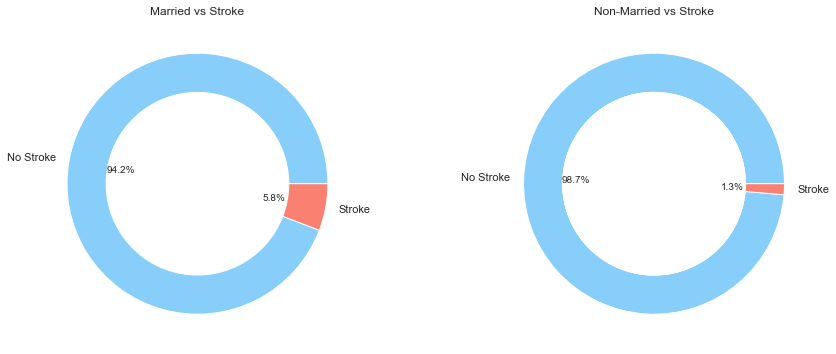

In [39]:
# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

label = ['No Stroke', 'Stroke']
color = ['lightskyblue', 'salmon']

# Create data for the first donut chart
counts1 = [
    len(df[(df['ever_married'] == 'Yes') & (df['stroke'] == 0)]),
    len(df[(df['ever_married'] == 'Yes') & (df['stroke'] == 1)]),
]

# Create the first donut chart
ax1.pie(counts1, labels=label, autopct='%1.1f%%', startangle=0, colors=color, wedgeprops={'width': 0.3})

# Add a white circle in the middle to create a donut chart
centre_circle1 = plt.Circle((0, 0), 0.70, fc='white')
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle1)

ax1.set_title('Married vs Stroke')

# Create data for the second donut chart
counts2 = [
    len(df[(df['ever_married'] == 'No') & (df['stroke'] == 0)]),
    len(df[(df['ever_married'] == 'No') & (df['stroke'] == 1)]),
]

# Create the second donut chart
ax2.pie(counts2, labels=label, autopct='%1.1f%%', startangle=0, colors=color, wedgeprops={'width': 0.3})

# Add a white circle in the middle to create a donut chart
centre_circle2 = plt.Circle((0, 0), 0.70, fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle2)

ax2.set_title('Non-Married vs Stroke')

# Show the plot
plt.show()


### Stroke based on Residence_type

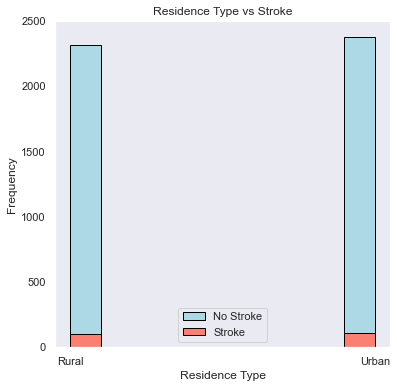

In [40]:
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the histogram of Residence_type for stroke and non-stroke patients
ax.hist(df[df['stroke'] == 0]['Residence_type'], edgecolor='black', color='lightblue', label='No Stroke')
ax.hist(df[df['stroke'] == 1]['Residence_type'], edgecolor='black', color='salmon', label='Stroke')
ax.set_xlabel('Residence Type')
ax.set_ylabel('Frequency')
ax.set_title('Residence Type vs Stroke')
ax.legend()

plt.show()


### Stroke based on work type

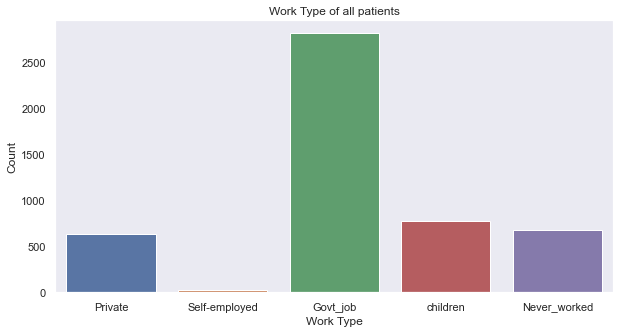

In [41]:
# Get unique values of work_type
unique_work_types = df['work_type'].unique()

# Create a bar plot using object oriented method
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=unique_work_types, y=df.groupby('work_type').size(), ax=ax)

# Set title and labels
ax.set_title('Work Type of all patients')
ax.set_xlabel('Work Type')
ax.set_ylabel('Count')

# Show the plot
plt.show()


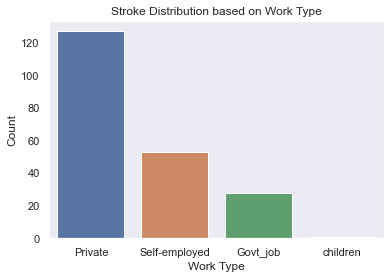

In [42]:
# different work type people who had stroke

sns.countplot(x='work_type', data=df_stroke)
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.title('Stroke Distribution based on Work Type')
plt.show()


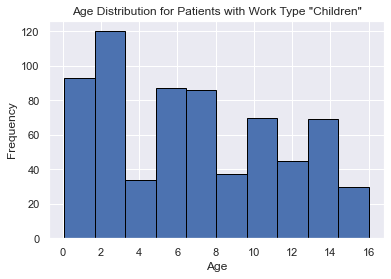

In [43]:
# age distribution where work type is Children

df_children = df[df['work_type'] == 'children']
df_children['age'].hist(bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for Patients with Work Type "Children"')
plt.show()


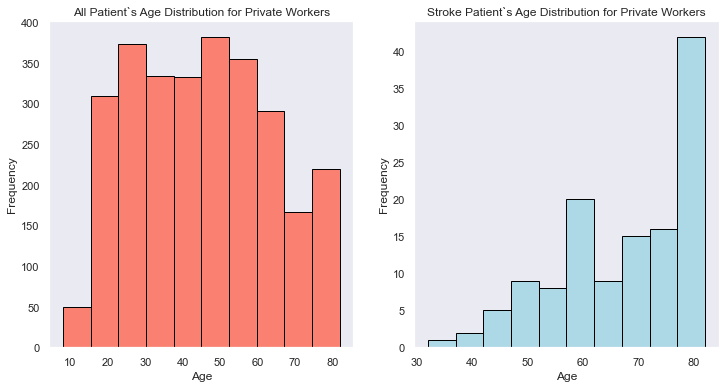

<Figure size 432x288 with 0 Axes>

In [45]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram of age for private workers in df
ax1.hist(df[df['work_type'] == 'Private']['age'], edgecolor='black', color='salmon')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.set_title('All Patient`s Age Distribution for Private Workers')

# Plot the histogram of age for private workers in df_stroke
ax2.hist(df_stroke[df_stroke['work_type'] == 'Private']['age'], edgecolor='black', color='lightblue')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')
ax2.set_title('Stroke Patient`s Age Distribution for Private Workers')

# Show the plot
plt.show()
plt.savefig("Age Distribution for Private Workers.png")

In [ ]:
# instances those have children as `work type`

children_work_type_count = df[df['work_type'] == 'children'].shape[0]
print(f"Number of instances with work type 'children': {children_work_type_count}")


Number of instances with work type 'children': 671


### Removing outliers

* bmi > 60 : total 13; none had stroke  ✅
* stroke patient under `age` 30 are outliers - index[245] ✅
* by removing all `work_type` = children ✅
* there's only one `gender`'s value is others - index[3116] ✅
* for all patients (not stroke + stroke) - experiment ⬇
  1. by keeping under 30 `age`
  2. by removing under 30 `age`
  3. by removing all `work_type` = children ✅
  * [Which model performs better]


---



* remove `bmi` over 60

In [ ]:
# bmi that have value higher than 60 and remove the instances

# Get the indices of rows where bmi is greater than 60
over_bmi = 60
bmi_outliers = df[df['bmi'] > over_bmi].index

# Drop the rows with outlier bmi values
df = df.drop(bmi_outliers)
print(f'{len(bmi_outliers)} Rows had over ',over_bmi,' bmi. Those are removed')

13 Rows had over  60  bmi. Those are removed


* remove the `stroke` patient who's `age < 30`

In [46]:
# remove the index 245

df = df.drop(245)
df_stroke = df_stroke.drop(245)

* remove all the `work_type=children`

In [47]:
remove_children=df[df['work_type']=='children'].index

# drop children
df = df.drop(remove_children)
print(f'{len(remove_children)} Rows are removed')

670 Rows are removed


In [37]:
age_outliers = df[df['age']<30.0].index
len(age_outliers)

0

In [39]:
# drop the instances where age<30

if df['age'].all()<30:
  age_outliers = df[df['age']<30].index

  # drop the age<30
  df = df.drop(age_outliers)
  df_stroke = df_stroke.drop(age_outliers)
  print(f'{len(age_outliers)} Rows are removed')
else:
  print('No data found')

0 Rows are removed


* remove other `gender`

In [50]:
# removing Other gender

# Get the indices of rows where gender is 'Other'
gender_other_indices = df[df['gender'] == 'Other'].index

# Check if there are any rows with gender 'Other'
if len(gender_other_indices) > 0:
  # Drop the rows with gender 'Other'
  df = df.drop(gender_other_indices)
  print('Successful: Row(s) with gender "Other" removed.')
else:
  print('Unsuccessful: No rows with gender "Other" found.')


Unsuccessful: No rows with gender "Other" found.


### Changing categorical values to numerical type
* ~`gender` : Male - 0 ; Female - 1~ ❌
* `smoking_status` :['formerly smoked' 'never smoked' 'smokes' 'Unknown'] ✅
* `work_type` : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked'] ✅
* ~`ever_married`  ['Yes' 'No']~ ❌
* ~`Residence_type`  ['Urban' 'Rural']~ ❌


---


As `smoking_status` and `work_type` catagories depicted to have relation with `stroke` atrribute while conducting EDA.So, these feature's instances would be turn into numerical data so that Machine can train upon the attributes.

* converting work_type attributes value from string to integer

In [18]:
if any(df['work_type'] == 'Private'):
    work_type_mapping = {
      'Private': 1,
      'Self-employed': 2,
      'Govt_job': 3,
      'Never_worked': 4}
  # Replace the categorical values in the 'work_type' column with numerical values
    df['work_type'] = df['work_type'].map(work_type_mapping)
    print('Converted datatype into numerical format.')

else:
    print('Already Converted into nemerical format')

Already Converted into nemerical format


In [19]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,1,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,1,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,1,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,2,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,1,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
3412,Female,57.0,0,0,Yes,1,Rural,77.93,21.7,never smoked,0
3413,Female,81.0,0,0,Yes,2,Urban,125.20,40.0,never smoked,0
3414,Female,35.0,0,0,Yes,2,Rural,82.99,30.6,never smoked,0
3415,Male,51.0,0,0,Yes,1,Rural,166.29,25.6,formerly smoked,0


`LabelEncoder` : for ordinal values
`OneHotEncoder`: for nominal values

Changing values of `gender`
* Male->0
* Female->1

In [ ]:
# change the value of gender where the values will be Male=0; and Female=1

#gender_mapping = {'Male': 0, 'Female': 1}
#df['gender'] = df['gender'].map(gender_mapping)

In [53]:
df.describe()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke
count,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000
mean,54.884121,0.128722,0.070344,1.547285,110.116112,30.919469,0.060712
std,14.754982,0.334940,0.255764,0.762409,49.264022,7.129056,0.238837
min,30.000000,0.000000,0.000000,1.000000,55.220000,11.300000,0.000000
25%,43.000000,0.000000,0.000000,1.000000,77.670000,26.100000,0.000000
50%,54.000000,0.000000,0.000000,1.000000,93.005000,29.750000,0.000000
75%,66.000000,0.000000,0.000000,2.000000,118.672500,34.500000,0.000000
max,82.000000,1.000000,1.000000,3.000000,271.740000,92.000000,1.000000


### Correlation Matrix

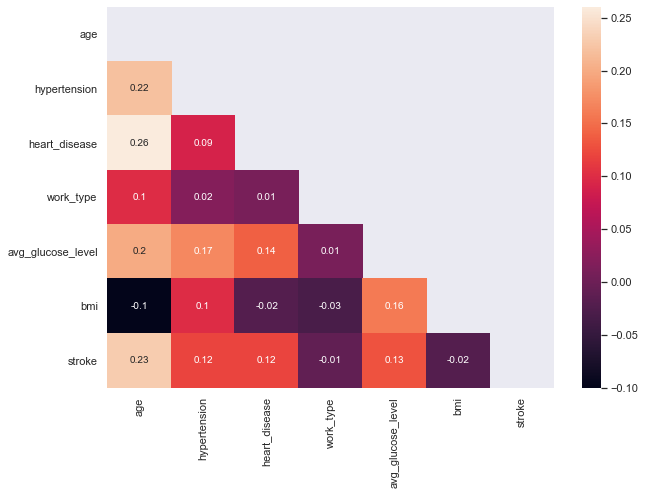

In [54]:
# corr() to calculate the correlation between variables
correlation_matrix = df.corr().round(2)
# changing the figure size
#plt.figure(figsize = (10, 7))

# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (10, 7))

# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

### Save the pre-processed data into CSV

In [20]:
# save pre-processed df into a csv file

file_location='Dataset/test-train-data.csv'
#df.to_csv(file_location)

### Load pre-processed data

In [23]:
# Specify the file location and name
file_location='Dataset/test-train-data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_location)

In [24]:
df

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,67.0,0,1,Yes,1,Urban,228.69,36.6,formerly smoked,1
1,1,Male,80.0,0,1,Yes,1,Rural,105.92,32.5,never smoked,1
2,2,Female,49.0,0,0,Yes,1,Urban,171.23,34.4,smokes,1
3,3,Female,79.0,1,0,Yes,2,Rural,174.12,24.0,never smoked,1
4,4,Male,81.0,0,0,Yes,1,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3412,3412,Female,57.0,0,0,Yes,1,Rural,77.93,21.7,never smoked,0
3413,3413,Female,81.0,0,0,Yes,2,Urban,125.20,40.0,never smoked,0
3414,3414,Female,35.0,0,0,Yes,2,Rural,82.99,30.6,never smoked,0
3415,3415,Male,51.0,0,0,Yes,1,Rural,166.29,25.6,formerly smoked,0


Distribution of stroke values after pre-processing data

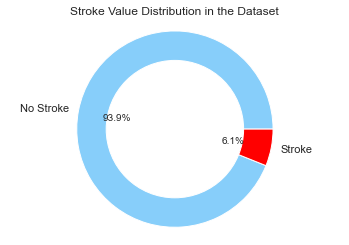

In [59]:
# a donut chart of stroke values

stroke_values = df.groupby('stroke').size()

labels = 'No Stroke', 'Stroke'
colors = ['lightskyblue', 'red']

plt.pie(stroke_values, labels=labels, autopct='%1.1f%%', startangle=0, colors=colors, wedgeprops={'width': 0.4})

# Add a white circle in the middle to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Stroke Value Distribution in the Dataset')
plt.axis('equal')
plt.show()


In [60]:
# how many of the stroke values have 0 and 1

stroke_values = df.groupby('stroke').size()
print(f"Number of patients with stroke value 0: {stroke_values[0]}")
print(f"Number of patients with stroke value 1: {stroke_values[1]}")


Number of patients with stroke value 0: 3218
Number of patients with stroke value 1: 208


## Feature Selection

Features:
* age
* hypertension
* avg_glucose_level
* bmi
* [ work_type || smoking_status ]

Target:
* stroke

In [61]:
X = df[['age','hypertension','avg_glucose_level','bmi', 'work_type']]
y = df['stroke']

* without work_type attribute

In [ ]:
X = df[['age','hypertension','avg_glucose_level','bmi']]
y = df['stroke']

## Model Creation

### Train-Test split (75-25)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25 , random_state=40)
print("Feature train shape: ", X_train.shape)
print("Feature test shape: ", X_test.shape)
print("Target train shape: ", y_train.shape)
print("Target test shape: ", y_test.shape)

Feature train shape:  (2569, 5)
Feature test shape:  (857, 5)
Target train shape:  (2569,)
Target test shape:  (857,)


In [63]:
X_train.head()

,age,hypertension,avg_glucose_level,bmi,work_type
186,63.0,0,116.69,34.5,2
1552,51.0,0,69.18,35.7,2
810,55.0,0,86.60,26.5,1
3144,79.0,0,82.07,30.4,2
1881,62.0,0,130.56,36.1,2


### Model Train & score `accuracy`

In [70]:
# the algorithms that will be used
algo={
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    #"SVM": svm.SVC(), #SVM gives same result as LR
    "DecisionTree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
    }

'''A method for fitting and scoring the algorithms'''
def algo_fit_score(algos,X_train,y_train,X_test,y_test):    
    np.random.seed(40)
    accuracy_score={} #values will be in the dict after execution

  #loop through different algo
    for name, i in algo.items():
        i.fit(X_train,y_train) #fit the train data to algo
        accuracy_score[name] = i.score(X_test,y_test)
    return accuracy_score

In [71]:
#assigning train-test data into the method to determine score of each trained algorithm
accuracy_score = algo_fit_score(algos=algo,
                             X_train=X_train,
                             X_test = X_test,
                             y_train=y_train,
                             y_test = y_test
                             )
accuracy_score

{'Logistic Regression': 0.9393232205367561,
 'KNN': 0.9276546091015169,
 'DecisionTree': 0.8809801633605601,
 'Naive Bayes': 0.9019836639439907}

### Algorithm Performance Comparison

In [ ]:
# accuracy in percentage

for key, value in accuracy_score.items():
  accuracy_score[key] = round(value * 100, 2)
print(accuracy_score)

{'Logistic Regression': 93.8, 'KNN': 93.1, 'DecisionTree': 91.11, 'Naive Bayes': 88.3}


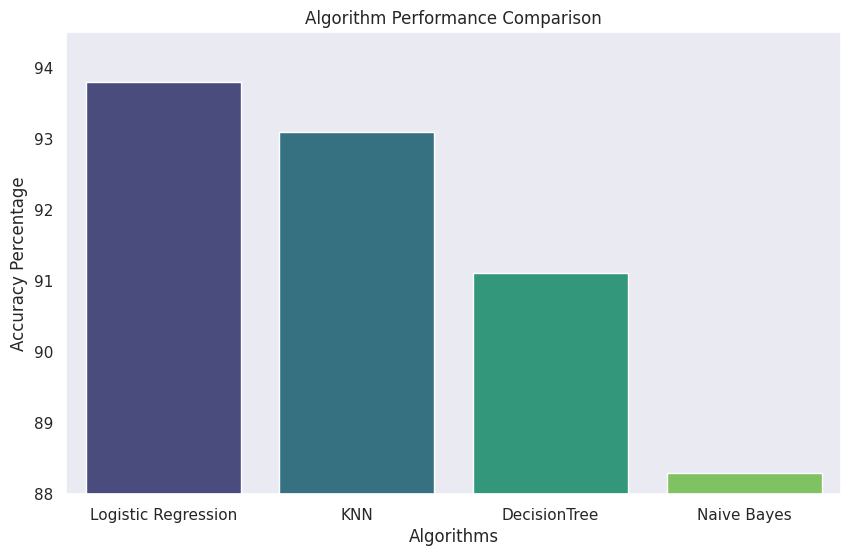

In [ ]:
algo_names = list(accuracy_score.keys())
algo_values = list(accuracy_score.values())

plt.figure(figsize=(10,6))
sns.barplot(x=algo_names, y=algo_values,hue=algo_names, palette='viridis')
plt.title('Algorithm Performance Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Percentage')
plt.ylim(88, 94.5)
plt.show();


* confusion matrix

In [ ]:
# confusion matrix of LogisticRegression in algo dict

# Get predictions
y_pred = algo['Logistic Regression'].predict(X_test)

# Generate confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Print confusion matrix
print(confusion_matrix)


[[802   0]
 [ 53   0]]


* precision

In [ ]:
# precision of LogisticRegression in algo dict

y_pred = algo['Logistic Regression'].predict(X_test)
precision = precision_score(y_test, y_pred)
print(f"Precision of Logistic Regression: {precision}")


Precision of Logistic Regression: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyperparameter Tuning

### - of Logistic Regression using GridSearchCV

In [ ]:
lr = algo['Logistic Regression']
type(lr)

sklearn.linear_model._logistic.LogisticRegression

In [ ]:
# Generate a sequence of 10 numbers between 1 and 100, equally spaced on a logarithmic scale.
sequence = np.logspace(0,32,33,base=2,dtype=int)
x=np.linspace(0,8,8,dtype=int)
# Print the sequence.
print(sequence)
x

[         1          2          4          8         16         32
         64        128        256        512       1024       2048
       4096       8192      16384      32768      65536     131072
     262144     524288    1048576    2097152    4194304    8388608
   16777216   33554432   67108864  134217728  268435456  536870912
 1073741824 2147483648 4294967296]


array([0, 1, 2, 3, 4, 5, 6, 8])

In [ ]:
lr_param = {"C":np.logspace(-10,10,100),
            "solver":['liblinear']}
cross_val = 10

gridSearch_lr =GridSearchCV(estimator=lr,
                            param_grid=lr_param,
                            cv = cross_val,
                            verbose=True)
gridSearch_lr.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-07, 4.32876...
       2.25701972e+05, 3.59381366e+05, 5.72236766e+05, 9.11162756e+05,
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gridSearch_lr.best_params_

{'C': 1e-10, 'solver': 'liblinear'}